# Laboratorio 7: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>


### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Núñez
- Nombre de alumno 2: Alonso Uribe


### **Link de repositorio de GitHub:** [Repositorio💻](https://github.com/carinunez/Labs_MDS/)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

### Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.



### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

1. Los datos de entrenamiento, tal como su nombre lo dice, son utilizados para entrenar el modelo. Mientras que los datos de validación permiten medir que tan bueno es el modelo y con ello encontrar los hiperparámetros de este.

2. La falta de etiquetas hace que el algoritmo deba encontrar los patrones "ocultos" en los datos, cuando se tiene gran cantidad de datos el proceso puede ser muy costoso computacionalmente. Otro problema es que estos algoritmos tienden a caer en overfitting, disminuyendo la capacidad de generalización del modelo. Además, los resutlados son difíciles de interpretar ya no se conoce etiquetas.


3. La matriz de confusión permite reportar de manera clara la cantidad de datos/observaciones que fueron asignadas a clase correcta y las que no.

4. - Accuracy: $\frac{\text{num predicciones correctas}}{\text{Predicciones totales}} = \frac{\text{TP +TN}}{\text{Predicciones totales}}$ da cuenta de la exactitud del modelo, proporción de verdaderos positivos y verdaderos negativos.
   - Precision: $P= \frac{\text{TP}}{\text{TP + FP}}$ proporción de las clases bien predichas corresponeden a la clase de interés (en el caso de clasificación binaria).
   - Recall: $R = \frac{\text{TP}}{\text{TP +FN}}$ porción de las observaciones clasificadas como positivas que realmente lo son.
   - F1 Score: $\frac{\text{2P*R}}{\text{P + R}}$ calcula una media armónica entre precision y recall por lo que es una métrica que balancea el resultado de cada una por si sola.

5. Métricas recomendadas:
   1. En el caso de la detección de fallas, se esperaría tener la menor cantidad de falsos positivos ya que esto podria generar atrasos o costos adicionales, de forma análoga de debería minimizar la cantidad de FN por lo que se debreía priorizar tanto la precisión como el recall, es por ello que se debería poner atención al f1 score.  

   2. Dado que se está detectando una enfermedad, lo que esperaría es minimizar la cantidad de falsos negativos posibles, entonces se debería buscar un Recall cercano a 1.
   3. En este caso, asignar créditos a personas que no están "aprobadas" sería lo más perjudicial (falsos positivos) por lo que se debería tener en cuenta la precisión del modelo.
   4. Suponieno que lo que se desea es minimizar la cantidad de crímenes dectados erróneamente, entonces había que enfocarse en el Recall.
   
6. La calibración de modelos permite eliminar sesgos propios de los modelos de ML y con ello poder realizar interpretaciones de mejor calidad.

# Parte práctica [48 puntos]

<p align="center">
  <img src="https://i.ibb.co/61L8z0w/renacin-by-volframio-dcirf4l-fullview.jpg"
" width="400">
</p>



Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [1]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except:
#     print('Ignorando conexión drive-colab')

## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Librerias utiles
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [3]:
df = pd.read_csv('stats_players.csv')
df_copy = df.copy()

df.head(5)

,Name,Nationality,National_Position,Club_Position,Height,Weight,Preffered_Foot,Age,Work_Rate,Weak_foot,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
0,Cristiano Ronaldo,Portugal,LS,LW,185,80,Right,32,High / Low,4,...,90,95,85,92,93,90,81,76,85,88
1,Lionel Messi,Argentina,RW,RW,170,72,Left,29,Medium / Medium,4,...,90,68,71,85,95,88,89,90,74,85
2,Neymar,Brazil,LW,LW,174,68,Right,25,High / Medium,5,...,96,61,62,78,89,77,79,84,81,83
3,Luis Suárez,Uruguay,LS,ST,182,85,Right,30,High / Medium,4,...,86,69,77,87,94,86,86,84,85,88
4,Manuel Neuer,Germany,GK,GK,193,92,Right,31,Medium / Medium,4,...,52,78,25,25,13,16,14,11,47,11


In [4]:
df.shape

(17588, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               17588 non-null  object
 1   Nationality        17588 non-null  object
 2   National_Position  1075 non-null   object
 3   Club_Position      17587 non-null  object
 4   Height             17588 non-null  int64 
 5   Weight             17588 non-null  int64 
 6   Preffered_Foot     17588 non-null  object
 7   Age                17588 non-null  int64 
 8   Work_Rate          17588 non-null  object
 9   Weak_foot          17588 non-null  int64 
 10  Skill_Moves        17588 non-null  int64 
 11  Ball_Control       17588 non-null  int64 
 12  Dribbling          17588 non-null  int64 
 13  Marking            17588 non-null  int64 
 14  Sliding_Tackle     17588 non-null  int64 
 15  Standing_Tackle    17588 non-null  int64 
 16  Aggression         17588 non-null  int64

In [6]:
# Asigno 0 si National_Position es NaN, 1 si no.
df['label'] =  df['National_Position'].notnull().astype('int')

# Cant por clase
df.label.value_counts()

,count
label,
0,16513
1,1075


In [7]:
1075/(1075+16513)

0.061121219012963385

Al observar la cantidad de datos por clase es posible notar que la mayoría de los jugadores no están seleccionados y solo el 6% de ellos lo está.

In [8]:
df['Work_Rate'].str.split(' / ', expand=True).rename({0:'Work1', 1:'Work2'}, axis=1)

,Work1,Work2
0,High,Low
1,Medium,Medium
2,High,Medium
3,High,Medium
4,Medium,Medium
...,...,...
17583,Medium,Medium
17584,Medium,Medium
17585,High,Medium
17586,Medium,Medium


In [9]:
# def transf_workRate(dataframe):
#   # dataframe['WorkRate'] = dataframe.apply(lambda x: x.str.split(' / '))
#   serie = pd.Series(dataframe.copy().to_numpy()[:,0])
#   frame = dataframe.copy()
#   print(serie.str.split(' / ', expand=True))
#   frame[['Work1', 'Work2']] = serie.str.split(' / ', expand=True)
#   ord_enc = OrdinalEncoder()
#   frame.drop(columns="Work_Rate", inplace=True)
#   ord_enc.fit_transform(frame[['Work1', 'Work2']])
#   return dataframe

# def t_workRate(dataframe, indice):
#     serie = pd.Series(dataframe.copy().to_numpy()[:,0])
#     dataframe[f'Work_{indice}'] = serie.str.split(' / ')[indice]
#     l_enc = LabelEncoder(['Low', 'Medium', 'High'])
#     data[f'Work_{indice}'] = l_enc.fit_transform(dataframe[[f'Work_{indice}']])
#   return dataframe


In [10]:
from sklearn.impute import SimpleImputer

useless_cols = ['Name', 'Nationality', 'National_Position', 'Work_Rate']

highCorr_cols = ['Weight', 'Ball_Control', 'Dribbling', 'Standing_Tackle',
                 'Sliding_Tackle', 'Interceptions', 'Short_Pass', 'Acceleration',
                  'Curve', 'Long_Shots', 'Volleys', 'Finishing', 'Shot_Power',
                 'Freekick_Accuracy']

standard_cols = ['Height', 'Weak_foot', 'Skill_Moves', 'Reactions', 'Vision',
                 'Composure', 'Speed', 'Strength', 'Balance', 'Agility',
                 'Jumping', 'Penalties', 'Aggression']

min_max_cols = ['Marking', 'Crossing', 'Age', 'Long_Pass', 'Stamina', 'Heading']


pipe_club = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                       ('labels_encod', OrdinalEncoder())])

col_transformer = ColumnTransformer([
                         ('drop_cols', 'drop', useless_cols),
                         ('club_pipe', pipe_club, ['Club_Position']),
                         ('one_hot', OneHotEncoder(drop='first', sparse_output=False), ['Preffered_Foot']),
                         ('drop_hight_corr', 'drop', highCorr_cols),
                         ('standard', StandardScaler(), standard_cols),
                         ('min_max', MinMaxScaler(), min_max_cols)],
                         remainder='passthrough',
                         verbose_feature_names_out=False)

col_transformer.set_output(transform='pandas')

df_new = col_transformer.fit_transform(df)

In [11]:
df_new.head(4)

,Club_Position,Preffered_Foot_Right,Height,Weak_foot,Skill_Moves,Reactions,Vision,Composure,Speed,Strength,...,Jumping,Penalties,Aggression,Marking,Crossing,Age,Long_Pass,Stamina,Heading,label
0,14.0,1.0,0.583453,1.625071,3.614412,3.690524,2.213453,2.235484,1.880549,1.190025,...,2.631689,2.257805,0.405838,0.213483,0.917647,0.500000,0.813953,0.964706,0.900000,1
1,24.0,0.0,-1.663748,1.625071,2.274171,3.582707,2.556176,2.828708,1.525945,-0.485601,...,0.269584,1.564729,-0.454009,0.112360,0.835294,0.400000,0.930233,0.752941,0.744444,1
2,14.0,1.0,-1.064495,3.149676,3.614412,2.827986,1.870729,1.790565,1.738707,-1.283518,...,-0.342814,2.005777,0.004576,0.202247,0.811765,0.266667,0.790698,0.811765,0.644444,1
3,27.0,1.0,0.134013,1.625071,2.274171,3.367072,2.144908,2.013024,0.816736,0.870858,...,0.357069,2.257805,1.265685,0.303371,0.835294,0.433333,0.662791,0.929412,0.811111,1


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17588 entries, 0 to 17587
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Club_Position         17588 non-null  float64
 1   Preffered_Foot_Right  17588 non-null  float64
 2   Height                17588 non-null  float64
 3   Weak_foot             17588 non-null  float64
 4   Skill_Moves           17588 non-null  float64
 5   Reactions             17588 non-null  float64
 6   Vision                17588 non-null  float64
 7   Composure             17588 non-null  float64
 8   Speed                 17588 non-null  float64
 9   Strength              17588 non-null  float64
 10  Balance               17588 non-null  float64
 11  Agility               17588 non-null  float64
 12  Jumping               17588 non-null  float64
 13  Penalties             17588 non-null  float64
 14  Aggression            17588 non-null  float64
 15  Marking            

 **Justficación de transformaciones**

1.   **'Name', 'Nationality':** fueron eliminadas ya que no aportan con información relevante.
2.   Se eliminó **'National_Position'**  porque estaba correlacionada con las labels.
3.  **'Preffered_Foot'** se le aplicó OneHotEncoder pues solo se tienen 2 categorías y se dejó como referencia si su pie preferido es el derecho.
4.**'Weight', 'Ball_Control', 'Dribbling', 'Standing_Tackle', 'Sliding_Tackle', 'Interceptions', 'Short_Pass', 'Acceleration', 'Curve', 'Long_Shots', 'Volleys', 'Finishing', 'Shot_Power','Freekick_Accuracy'** :  fueron eliminadas ya que estaban altamente correlacionadas con otras variables, por lo que solo dejamos una de ellas para no tener información redundante.
5. **'Height', 'Weak_foot', 'Skill_Moves', 'Reactions', 'Vision','Composure', 'Speed', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties', 'Aggression'**: a estas variables se les aplicó StandarScaler, pues al revisar la distribución de estas, tienen una distribución similar a Gaussiana por lo que se estandarizó para dejar las variables con rangos similares.
6. **'Marking', 'Crossing', 'Age', 'Long_Pass', 'Stamina', 'Heading'** a estas variables se les aplicó MinMaxScaler ya que no tienen una distribución gaussiana pero al aplicar esta transformación, todas las variables tendrían el mismo rango de valores lo que ayudaría a mejorar el rendimiento de los algoritmos.
7. Se creó una pipeline para **'Club_Position** para imputar el valor nulo por el más frecuente en esa fila y luego se aplicó LabelEncoder para tener solo datos númericos en el dataframe.

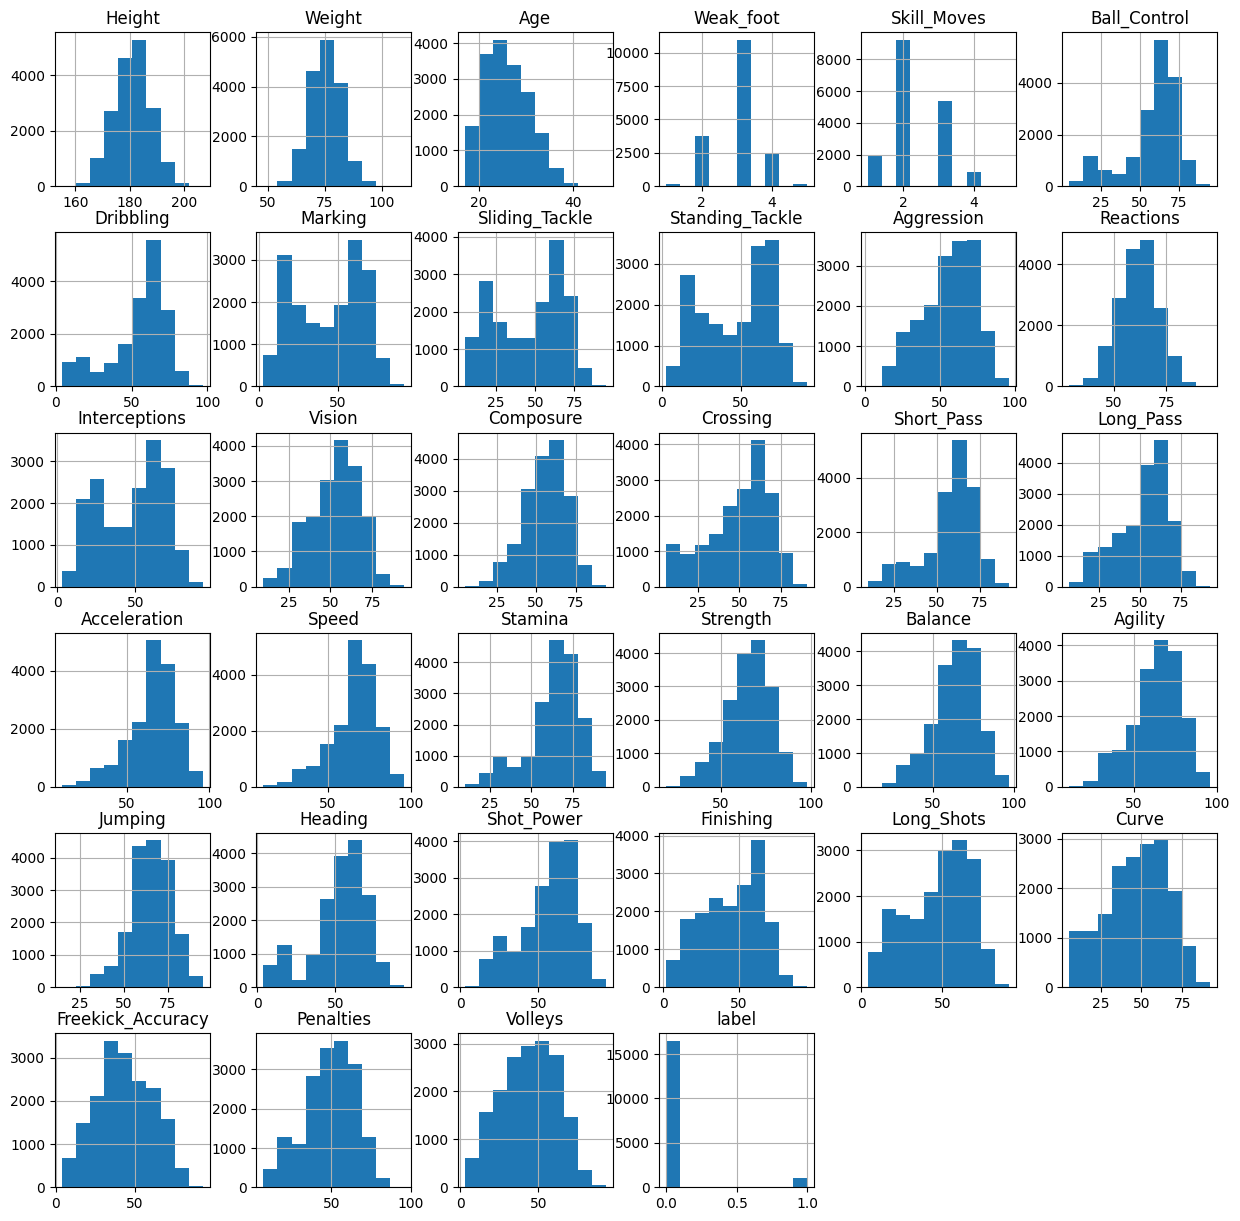

In [13]:
numerical_cols = (df.select_dtypes('number').columns.to_list())
df[numerical_cols].hist(figsize=(15, 15));

In [14]:
df_corr = df[numerical_cols].corr()
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x = df_corr.columns,
        y = df_corr.index,
        z = np.array(df_corr),
        text=df_corr.values,
        texttemplate='%{text:.2f}'
        )
)
fig.update_layout(title_text='Correlación entre las variables numéricas originales',
                    height=800, width=1200)
fig.show()

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [15]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns='label').copy()
y = df['label'].copy()

# Train Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, shuffle=True,
                                                    stratify=y) #mantengo la prop de clases

# Pipeline
pipe_xgboost = Pipeline([('col_transf', col_transformer),
                            ('xgboost_classifier', XGBClassifier())])
pipe_lightlgbm = Pipeline([('col_transf', col_transformer),
                            ('lgbm_classifier', LGBMClassifier(verbose=-1))])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




In [16]:
# Entrenamiento
xgb_pipe = pipe_xgboost.fit(X_train, y_train)
y_pred_xgb = pipe_xgboost.predict(X_test)

lgbm_pipe = pipe_lightlgbm.fit(X_train, y_train)
y_pred_lgbm = pipe_lightlgbm.predict(X_test)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [17]:
# Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Métricas XGBOOST')
print(' ')
print('Accuracy: ', accuracy_score(y_test, y_pred_xgb))
print('Precision: ', precision_score(y_test, y_pred_xgb))
print('Recall: ', recall_score(y_test, y_pred_xgb))
print(' ')
print('-----------     Classification Report     -----------')
print(classification_report(y_test, y_pred_xgb))

Métricas XGBOOST
 
Accuracy:  0.9378434716695092
Precision:  0.46987951807228917
Recall:  0.12074303405572756
 
-----------     Classification Report     -----------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4954
           1       0.47      0.12      0.19       323

    accuracy                           0.94      5277
   macro avg       0.71      0.56      0.58      5277
weighted avg       0.92      0.94      0.92      5277



Explicación XGBoost
  1. Accuracy = 0.93784 da cuenta de que el 93.784% de las predicciones fueron realizadas correctamente (tanto clase positiva como negativa).
  2. Precisión = 0.4698 da cuenta de que solo el 47% de las predicciones de la clase positiva fueron realizadas correctamente.
  3. Recall = 0.1207 hace referencia a que solo el 12.07% de las predicciones realizadas efectivamente correspondan a la clase positiva (considerando true positive y false negative).

  Las métricas calculadas coinciden con los valores reportados en el ``clasification_report``.


In [18]:
print('Métricas LightGBM')
print(' ')
print('Accuracy: ', accuracy_score(y_test, y_pred_lgbm))
print('Precision: ', precision_score(y_test, y_pred_lgbm))
print('Recall: ', recall_score(y_test, y_pred_lgbm))
print(' ')
print('-----------     Classification Report     -----------')
print(classification_report(y_test, y_pred_lgbm))

Métricas LightGBM
 
Accuracy:  0.9403069926094372
Precision:  0.5540540540540541
Recall:  0.12693498452012383
 
-----------     Classification Report     -----------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4954
           1       0.55      0.13      0.21       323

    accuracy                           0.94      5277
   macro avg       0.75      0.56      0.59      5277
weighted avg       0.92      0.94      0.92      5277



Explicación LightGBM
  1. Accuracy = 0.9403 da cuenta de que el 94.03% de las predicciones fueron realizadas correctamente (tanto clase positiva como negativa).
  2. Precisión = 0.554 da cuenta de que solo el 55.4% de las predicciones de la clase positiva fueron realizadas correctamente.
  3. Recall = 0.1269 hace referencia a que solo el 12.69% de las predicciones realizadas efectivamente correspondan a la clase positiva (considerando true positive y false negative).

  Las métricas calculadas coinciden con los valores reportados en el ``clasification_report``.


Es importante tener en cuenta que ambos modelos no son buenos para clasificar la clase de interés, esto se puede deber a que la cantidad de muestras de esta es considerablemente menor en comparación a la clase 0.

**Mejor métrica**

Como nos importa saber quienes efectivamente son seleccionados nacionales, lo que debemos hacer es revisar el Recall. Mientras mayor sea esta métrica, menor será la cantidad de falsos negativos, es decir, de menor será la cantidad de seleccionados nacionales que fueron clasificados erróneamente.
Bajo el argumento anterior, el mejor modelo sería LIghtGBM pues su recall es ligeramente mayor.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un **clasificador enfocado en predecir la mejor posición de los jugadores** en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [19]:
data = df_copy.copy()

In [20]:
# Como hay 1 dato nulo en Club_Position, primero haré una imputación por el valor
# más frecuente y luego asignaré las labels
data.dropna(subset = ['Club_Position'], inplace=True)


data.loc[(data['Club_Position']=='ST')| (data['Club_Position']=='CF'), 'label'] = 'ataque'

data.loc[(data['Club_Position']=='RW')| (data['Club_Position']=='CAM')
      |(data['Club_Position']=='LW'), 'label'] = 'central_ataque'

data.loc[(data['Club_Position']=='RM')| (data['Club_Position']=='CM')
      |(data['Club_Position']=='LM'), 'label'] = 'central'

data.loc[(data['Club_Position']=='RWB')| (data['Club_Position']=='CDM')
      |(data['Club_Position']=='LWB'), 'label'] = 'central_defensa'

data.loc[(data['Club_Position']=='RB')| (data['Club_Position']=='CB')
      |(data['Club_Position']=='LB'), 'label'] = 'defensa'

data.loc[(data['Club_Position']=='GK'), 'label'] = 'arquero'

# Elimina 'Sub' y 'Res'
index_drop = data.loc[(data['Club_Position']=='Sub')|(data['Club_Position']=='Res')].index.to_list()
data.drop(index=index_drop, inplace=True)


# Asignaré 'Otro' para las otras posiciones que quedan
data.fillna({'label':'Otro'}, inplace=True)

In [21]:
# Datos por clase
data.label.value_counts()

,count
label,
nan,3010
defensa,1180
central,907
arquero,632
central_ataque,581
ataque,430
central_defensa,209


In [22]:
X_new = data.drop(columns='label').copy()

y_new = data['label'].copy()

# Train Test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y_new, test_size=0.3,
                                                    random_state=42, shuffle=True,
                                                    stratify=y_new)

In [23]:
# Crear nuevo Pipeline con otro clasificado y comentar métricas
data.shape

(6949, 40)

Dado que tenemos que predecir categorías y que al dejar fuera las clases 'Sub' y 'Res' quedan 6950 filas, entonces se podría utilizar Linear SVC (según la guía).

In [24]:
from sklearn.svm import LinearSVC

pipe_SVC = Pipeline([('col_transf', col_transformer),
                            ('linearSVC_classifier', LinearSVC())])

# Entrenamiento
svc_pipe = pipe_SVC.fit(X_train2, y_train2)
y_pred_svc = pipe_SVC.predict(X_test2)

# Metricas
print('-----------     Classification Report     -----------')
print(classification_report(y_test2, y_pred_svc))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



-----------     Classification Report     -----------
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.62      0.99      0.76       129
        central       0.60      0.49      0.54       272
 central_ataque       0.55      0.55      0.55       174
central_defensa       0.00      0.00      0.00        63
        defensa       0.67      0.81      0.73       354
            nan       0.79      0.75      0.77       903

       accuracy                           0.73      2085
      macro avg       0.60      0.66      0.62      2085
   weighted avg       0.71      0.73      0.71      2085



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Tal como se puede observar, el modelo predice perfectamente a los ``arqueros``, y muy mal a ``central_defensa``. De modo general, es posible decir que el clasificador tiene un accuracy de 0.72, dando cuenta de que predice correctamente cerca del 72% de los datos.

Ahora, para ver si hay otro clasificador que permite observar un mejor rendimiento, observamos que nuestros datos luego del col_transformer no tendrá datos numéricos por lo que podría ser buena idea utilizar KNeighbors, según el diagrama de la [guía](https://scikit-learn.org/stable/machine_learning_map.html).



In [25]:
from sklearn.neighbors import KNeighborsClassifier

pipe_kn = Pipeline([('col_transf', col_transformer),
                            ('kneighbors_classifier', KNeighborsClassifier())])

# Entrenamiento
kn_pipe = pipe_kn.fit(X_train2, y_train2)
y_pred_kn = pipe_kn.predict(X_test2)

# Metricas
print('-----------     Classification Report     -----------')
print(classification_report(y_test2, y_pred_kn))

-----------     Classification Report     -----------
                 precision    recall  f1-score   support

        arquero       1.00      1.00      1.00       190
         ataque       0.96      0.99      0.98       129
        central       0.82      0.97      0.89       272
 central_ataque       0.94      0.86      0.89       174
central_defensa       0.92      0.75      0.82        63
        defensa       0.94      0.95      0.95       354
            nan       0.95      0.92      0.94       903

       accuracy                           0.93      2085
      macro avg       0.93      0.92      0.92      2085
   weighted avg       0.94      0.93      0.93      2085



Tal como se esperaba, el rendimiento mejoró considerablemente,de hecho, todas las clases mejoraron sus métricas. Si bien ``central_defensa`` sigue siendo una de las clases peor clasificadas, ahora tiene una precisión de 0.89 en lugar de 0.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

  - et: Extra Trees Classifier
    
      Fitea de manera aleatoria árboles de decisión en subconjunto de los datos y promedia sus resultados para obtener un mejor modelo.

  - rf: Random Forest

      Similar a 'et' pero con bootstraping.

  - dt: Decision Tree Classifier
    
      El clásico árbol de decisión, decide el mejor criterio para clasificar por categorias una entrada.

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

In [26]:
#  !pip install pycaret

In [104]:
from pycaret.datasets import get_data
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# 1.1
clf = setup(df, target='label')

,Description,Value
0,Session id,2111
1,Target,label
2,Target type,Binary
3,Original data shape,"(17588, 40)"
4,Transformed data shape,"(17588, 48)"
5,Transformed train set shape,"(12311, 48)"
6,Transformed test set shape,"(5277, 48)"
7,Numeric features,33
8,Categorical features,6
9,Rows with missing values,93.9%


In [105]:
tree_models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm']
best_model = compare_models(include=tree_models, n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9562,0.6473,0.2954,0.6791,0.4106,0.3993,0.4373,0.3090
rf,Random Forest Classifier,0.9478,0.9316,0.1569,0.9194,0.2623,0.2500,0.3607,1.7370
et,Extra Trees Classifier,0.9471,0.9066,0.1464,0.9188,0.2480,0.2359,0.3485,1.2210
lightgbm,Light Gradient Boosting Machine,0.9407,0.7294,0.0408,0.1000,0.0579,0.0550,0.0578,1.9580
xgboost,Extreme Gradient Boosting,0.9382,0.8648,0.0000,0.0000,0.0000,-0.0014,-0.0048,0.7630


Processing:   0%|          | 0/29 [00:00<?, ?it/s]

El mejor en performance de falsos positivos o Precision es Extra Tree Classifier ('et')

In [56]:
evaluate_model(best_model[2])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Confusion Matrix**: Los verdaderos positivos se priorizan a costa de tener muchos falsos positivos, los verdaderos negativos guardan una buena proporción en comparación con los falsos negativos

**Threshold**: Debido al desvalance de clases, un threshold menos a 0.5 puede mejor el desempeño del modelo en todas las métricas, pero para nuestro caso solo se necesita precision. Vale la pena estudiar esta curva en otros modelos para ver si puede mejorar la precision sin sacrificar su robustes.

**Feature Importance**: Nombre, National Position, Nationality, Reaction. Esto puede deberse a que lo más importante de un jugador es la popularidad y el desempeño comparativo.

**Learning Curve**: El modelo tiene overfitting

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [83]:
xgboost = compare_models(include=['xgboost'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9386,0.8426,0.0027,0.1333,0.0052,0.0039,0.0143,0.7240


Processing:   0%|          | 0/9 [00:00<?, ?it/s]

<Axes: >

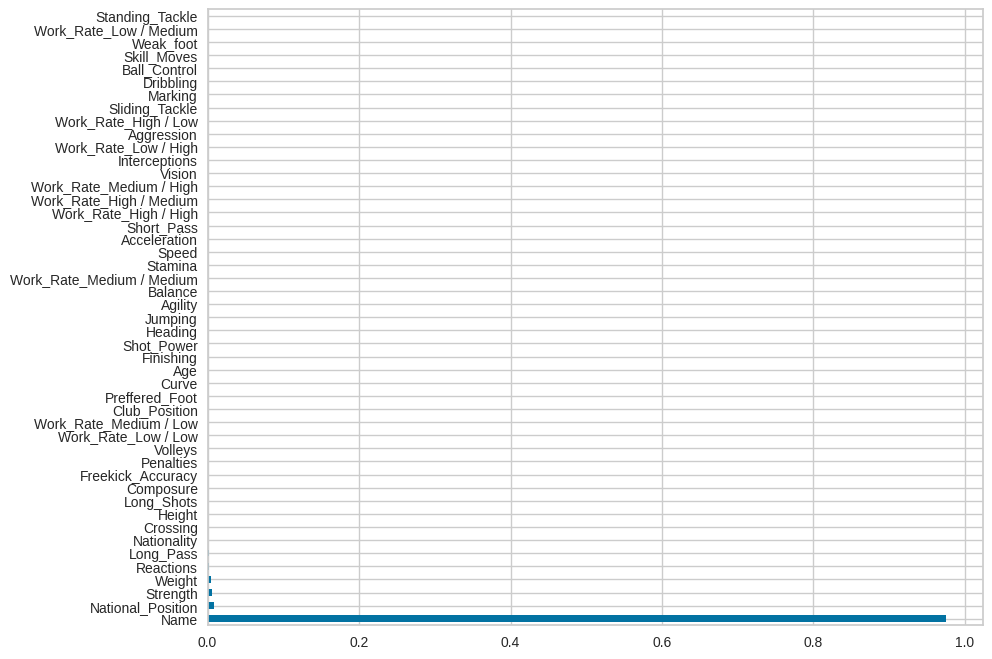

In [88]:
feat_importances = pd.DataFrame(
    xgboost.feature_importances_,
    xgboost.feature_names_in_,
    columns=["Importance"]
)
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='barh', figsize=(10,8), legend=False)

In [92]:
# 7 caracteristicas más importantes
feat_importances[:7]

,Importance
Name,0.974578
National_Position,0.008143
Strength,0.006330
Weight,0.004860
Reactions,0.002387
Long_Pass,0.001577
Nationality,0.001018


In [60]:
new_df = df.copy()
new_df.drop(columns='Work_Rate', inplace=True)

def eliminate_var(n=6):
    clf = setup(new_df, target='label', verbose=False)
    xgboost = create_model('xgboost', verbose=False)
    feat_importances = pd.DataFrame(
    xgboost.feature_importances_,
    xgboost.feature_names_in_,
    columns=["Importance"]
    )
    feat_importances = feat_importances.sort_values(by='Importance', ascending=True)
    feat_importances.reset_index(inplace=True)
    droped = feat_importances.loc[0,"index"]
    # print(droped)
    new_df.drop(columns=droped, inplace=True)
    if n < len(new_df.columns):
      eliminate_var(n=n)

eliminate_var()

Vision
Volleys
Interceptions
Penalties
Freekick_Accuracy
Sliding_Tackle
Curve
Long_Shots
Finishing
Shot_Power
Heading
Jumping
Skill_Moves
Agility
Marking
Balance
National_Position
Standing_Tackle
Speed
Acceleration
Preffered_Foot
Dribbling
Club_Position
Height
Weak_foot
Age
Crossing
Stamina
Aggression
Strength
Long_Pass
Ball_Control
Short_Pass


In [61]:
new_df

,Name,Nationality,Weight,Reactions,Composure,label
0,Cristiano Ronaldo,Portugal,80,96,86,1
1,Lionel Messi,Argentina,72,95,94,1
2,Neymar,Brazil,68,88,80,1
3,Luis Suárez,Uruguay,85,93,83,1
4,Manuel Neuer,Germany,92,85,70,1
...,...,...,...,...,...,...
17583,Adam Dunbar,Republic of Ireland,82,48,35,0
17584,Dylan McGoey,Republic of Ireland,80,43,22,0
17585,Tommy Ouldridge,England,61,42,35,0
17586,Mark Foden,Scotland,80,46,28,0


In [94]:
# Nuevo modelo
clf2 = setup(new_df, target='label', verbose=False)
xgboost_new = create_model('xgboost', verbose=False)
feat_importances_new = pd.DataFrame(
    xgboost_new.feature_importances_,
    xgboost_new.feature_names_in_,
    columns=["Importance"]
    )

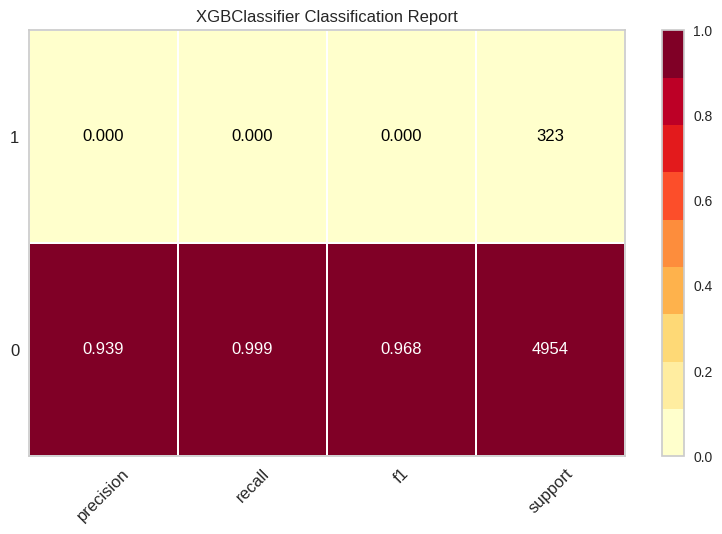

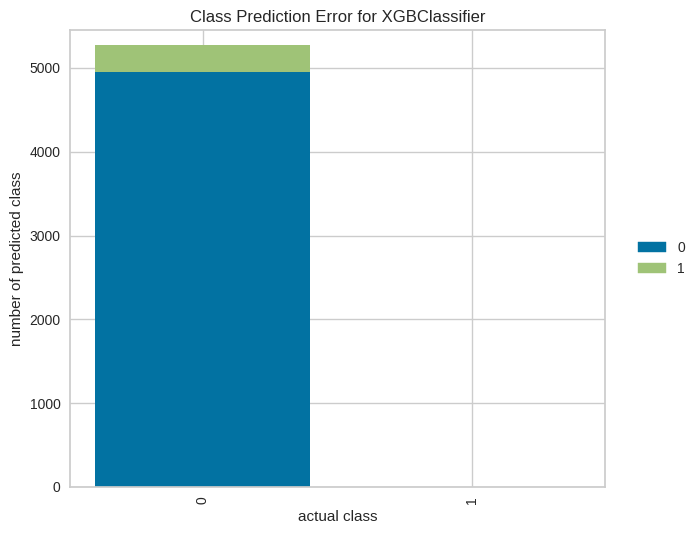

In [95]:
plot_model(xgboost_new, plot ='class_report')
plot_model(xgboost_new, plot ='error')


In [68]:
new_df.label.value_counts()

,count
label,
0,16513
1,1075


Al revisar el rendimiento del modelo es posible observar que no es capaz de aprender las características para predecir la clase 1, pues tal como ocurrió antes, solo el 6.1% de los datos pertenecen a la clase de interés. Entonces para mejorar el rendimiento del modelo habría que implementar alguna técnica como Undersampling u Oversampling, por ejemplo.

5.
  - El nuevo modelo se comporta similar al original, pues ambos tienen un Recall de bajo para la clase de interés, sin embargo el nuevo modelo tiene una mejora de la precisión para la clase 0.

  - Al eliminar variables, el entrenamiento tomó menos tiempo. Sin embargo, tal como se pudo apreciar, esta reducción  de variables disminuyó la capacidad del modelo para clasificar la variable de interés. Además al preferir variables como Nombre o Nacionalidad, podría indicar que hay un sesgo para la clasificación.

  - Considerando las variables del nuevo modelo, se podría decir que el hecho de que un jugador esté clasificado o no depende se factores personales, más que de la habilidad que presenten, pues este sólo utiliza **'Name', 'Nationality', 'Weight', 'Composure' y 'Reactions'** para entrenar. Además, es posible notar que la mayoría las variables eliminadas coinciden con las eliminadas en la Parte 1 debido a que estaban altamente correlacionadas.
  Si bien la eliminación de características permite entender mejor qué factores son más influyentes para determinar que jugador será seleccionado nacional, no creo que las características que seleccionó el modelo sean las mejores, ya que tal como se observó el modelo no fue capaz de clasificar correctamente a los seleccionados nacionales.



### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

In [110]:
# Aplicar una calibración con incremento monotónico de las prob-> regresion isotónica
# Brier Score antes y después de calibrar
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

clf2 = setup(new_df, target='label', verbose=False)
xgboost_new = create_model('xgboost', verbose=False)


# Esta malito:c
print('Brian Score pre-calibración', brier_score_loss(y, y_prob))

calibrated = CalibratedClassifierCV(xgboost_new, method='isotonic', cv=3)

print('Brian Score post-calibración', brier_score_loss(y_true, y_prob))

In [112]:
help(create_model)

Help on function create_model in module pycaret.classification.functional:

create_model(estimator: Union[str, Any], fold: Union[int, Any, NoneType] = None, round: int = 4, cross_validation: bool = True, fit_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, probability_threshold: Optional[float] = None, experiment_custom_tags: Optional[Dict[str, Any]] = None, engine: Optional[str] = None, verbose: bool = True, return_train_score: bool = False, **kwargs) -> Any
    This function trains and evaluates the performance of a given estimator
    using cross validation. The output of this function is a score grid with
    CV scores by fold. Metrics evaluated during CV can be accessed using the
    ``get_metrics`` function. Custom metrics can be added or removed using
    ``add_metric`` and ``remove_metric`` function. All the available models
    can be accessed using the ``models`` function.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >